# Check Algorithm Profits

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
def trasform_ratios_to_probs(df):
    df_copy = df.copy()
    for column in df_copy.columns:
        df_copy[column] = (1/df_copy[column])
    normalization_factor = df_copy.sum(axis = 1)
    for column in df_copy.columns:
        df_copy[column] /= normalization_factor
    return df_copy

def get_naive_predictions(df):
    return pd.Series(np.array(df).argmax(axis = 1),index = df.index)

def calc_rolling_mean(df,input_column):
    series      = df[input_column]
    window_len  = len(series.index)
    temp_list   = [0] + list(series.rolling(window = window_len,min_periods = 1,center = False).mean())[0:-1]
    return pd.Series(temp_list,index = series.index)

def calc_rolling_sum(df,input_column):
    series      = df[input_column]
    window_len  = len(series.index)
    temp_list   = [0] + list(series.rolling(window = window_len,min_periods = 1,center = False).sum())[0:-1]
    return pd.Series(temp_list,index = series.index)

def get_optimal_bet_ratio(df,bet_houses,pred):
    dic = {0:"D",1:"H",2:"A"}
    temp_pred = pred.map(dic)
    temp = []
    for index in temp_pred.index:
        new_list = [x + temp_pred.at[index] for x in bet_houses]
        temp.append(df.loc[index][new_list].max())
    return pd.Series(temp,index = df.index)

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [39]:
matches = pd.read_csv("databases/my_matches_db.csv",encoding='latin-1', index_col = [0], skipinitialspace = True)
matches.head()

,league,season,stage,home_team_name,away_team_name,score,home_points,home_norm_points,home_position,home_straight_wins,...,B365H,WHH,VCH,B365A,WHA,VCA,B365D,WHD,VCD,win_lose_draw
0,England Premier League,2008/2009,1,Manchester United,Newcastle United,1 - 1,0.0,0.0,0.0,0.0,...,1.29,1.25,1.28,11.00,10.00,12.00,5.5,4.5,5.5,0
1,England Premier League,2008/2009,1,Arsenal,West Bromwich Albion,1 - 0,0.0,0.0,0.0,0.0,...,1.20,1.17,1.25,15.00,12.00,13.00,6.5,5.5,6.0,1
2,England Premier League,2008/2009,1,Sunderland,Liverpool,0 - 1,0.0,0.0,0.0,0.0,...,5.50,5.50,5.50,1.67,1.57,1.65,3.6,3.3,3.8,2
3,England Premier League,2008/2009,1,West Ham United,Wigan Athletic,2 - 1,0.0,0.0,0.0,0.0,...,1.91,1.83,1.90,4.20,3.75,4.35,3.4,3.2,3.5,1
4,England Premier League,2008/2009,1,Aston Villa,Manchester City,4 - 2,0.0,0.0,0.0,0.0,...,1.91,1.91,1.90,4.33,3.50,4.35,3.4,3.2,3.5,1


In [161]:
type([2,2])==list

True

In [42]:
all_models = ["DecisionTreeClassifier","KNeighborsClassifier","LogisticRegression","RandomForestClassifier","nn_model","final_soft_decision"]

my_predictions = {}

for model in all_models:
    my_predictions[model] = pd.read_csv("databases/my_predictions/" + model + ".csv", index_col = [0], skipinitialspace = True)
    print(my_predictions[model].head())

     MYD  MYH  MYA
900  0.0  1.0  0.0
901  1.0  0.0  0.0
902  0.0  1.0  0.0
903  0.0  0.0  1.0
904  0.0  1.0  0.0
          MYD       MYH       MYA
900  0.216216  0.756757  0.027027
901  0.216216  0.567568  0.216216
902  0.378378  0.486486  0.135135
903  0.297297  0.297297  0.405405
904  0.216216  0.567568  0.216216
          MYD       MYH       MYA
900  0.132928  0.829306  0.037766
901  0.287462  0.519163  0.193375
902  0.315450  0.477780  0.206769
903  0.337614  0.379321  0.283066
904  0.261315  0.614044  0.124641
          MYD       MYH       MYA
900  0.141667  0.808333  0.050000
901  0.261667  0.530000  0.208333
902  0.296667  0.525000  0.178333
903  0.255000  0.293333  0.451667
904  0.241667  0.596667  0.161667
          MYD       MYH       MYA
900  0.259731  0.479682  0.260587
901  0.283181  0.407653  0.309166
902  0.305294  0.410982  0.283724
903  0.253711  0.316386  0.429903
904  0.295828  0.429954  0.274217
          MYD       MYH       MYA
900  0.150108  0.774816  0.075076
90

### Betting odds features

In [43]:
b365_features = ["B365D","B365H","B365A"]
wh_features   = ["WHD","WHH","WHA"]
vc_features   = ["VCD","VCH","VCA"]
my_features   = ["MYD","MYH","MYA"]

bet_houses    = ["B365","WH","VC"]

current_bet   = my_features

In [166]:
matches[my_features] = my_predictions["RandomForestClassifier"]
predictions_models_names = ["DecisionTreeClassifier","KNeighborsClassifier","LogisticRegression"
                            ,"RandomForestClassifier","nn_model","final_soft_decision","B365","WH","VC"]

In [120]:
matches[my_features].head()

,MYD,MYH,MYA
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [155]:
new_matches = matches.dropna(axis = 0)
new_matches.head()

,league,season,stage,home_team_name,away_team_name,score,home_points,home_norm_points,home_position,home_straight_wins,...,B365A,WHA,VCA,B365D,WHD,VCD,win_lose_draw,MYD,MYH,MYA
900,England Premier League,2010/2011,15,Manchester United,Blackburn Rovers,7 - 1,28.0,1.000000,2.0,1.0,...,13.00,11.0,13.0,5.5,5.0,6.0,1,0.150108,0.774816,0.075076
901,England Premier League,2010/2011,15,Tottenham Hotspur,Liverpool,2 - 1,22.0,0.785714,6.0,2.0,...,3.80,4.0,3.8,3.4,3.2,3.4,1,0.409705,0.404877,0.185418
902,England Premier League,2010/2011,15,West Ham United,Wigan Athletic,3 - 1,9.0,0.321429,20.0,0.0,...,3.75,3.5,4.0,3.5,3.3,3.4,1,0.259158,0.580050,0.160792
903,England Premier League,2010/2011,15,Aston Villa,Arsenal,2 - 4,17.0,0.607143,13.0,0.0,...,2.20,2.1,2.2,3.3,3.3,3.4,2,0.228724,0.257267,0.514008
904,England Premier League,2010/2011,15,Everton,West Bromwich Albion,1 - 4,16.0,0.571429,14.0,0.0,...,6.50,6.0,6.5,3.8,3.6,4.0,2,0.203005,0.641647,0.155348


###  Features with nan values

In [60]:
max_bet_per_match = 500

In [61]:
matches_betting_odds_features = new_matches[current_bet].dropna(axis = 0)

if current_bet != my_features:
    matches_betting_odds_features = trasform_ratios_to_probs(matches_betting_odds_features)
    
new_matches["predictions"] = get_naive_predictions(matches_betting_odds_features[current_bet])

matches_betting_odds_features["predictions"] = new_matches["predictions"]
matches_betting_odds_features["real_score"]  = new_matches['win_lose_draw']
matches_betting_odds_features["right_wrong"] = pd.Series(matches_betting_odds_features["real_score"] == matches_betting_odds_features["predictions"],dtype = int)
matches_betting_odds_features["bet_ratio"]   = get_optimal_bet_ratio(new_matches,bet_houses,matches_betting_odds_features["predictions"])


matches_betting_odds_features.head()

C:\Users\davidna2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,MYD,MYH,MYA,predictions,real_score,right_wrong,bet_ratio
900,0.141667,0.808333,0.050000,1,1,1,1.30
901,0.261667,0.530000,0.208333,1,1,1,2.10
902,0.296667,0.525000,0.178333,1,1,1,2.10
903,0.255000,0.293333,0.451667,2,2,1,2.20
904,0.241667,0.596667,0.161667,1,2,0,1.62


In [62]:
new_matches_betting_odds_features = matches_betting_odds_features.drop(["predictions","real_score"],axis = 1)

In [63]:
new_matches_betting_odds_features.head()

,MYD,MYH,MYA,right_wrong,bet_ratio
900,0.141667,0.808333,0.050000,1,1.30
901,0.261667,0.530000,0.208333,1,2.10
902,0.296667,0.525000,0.178333,1,2.10
903,0.255000,0.293333,0.451667,1,2.20
904,0.241667,0.596667,0.161667,0,1.62


In [64]:
calc_rolling_mean(new_matches_betting_odds_features,"right_wrong").tail()

12870    0.516429
12871    0.516269
12873    0.516419
12874    0.516259
12875    0.516099
dtype: float64

In [66]:
new_features = new_matches_betting_odds_features.drop(["right_wrong"],axis = 1)
new_lables   = new_matches_betting_odds_features["right_wrong"]

### Spliting the data 

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train_outer, X_test_outer, y_train_outer, y_test_outer = train_test_split(new_features, new_lables, test_size = 0.30, random_state = 101)

In [73]:
X_train_outer.drop("bet_ratio",axis = 1,inplace = True)

C:\Users\davidna2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
X_train_inner, X_test_inner, y_train_inner, y_test_inner = train_test_split(X_train_outer, y_train_outer, test_size = 0.30, random_state = 101)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
logmodel = LogisticRegression()
logmodel.fit(X_train_inner,y_train_inner)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train_inner,y_train_inner)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [78]:
chosen_model = rfc
predictions  = chosen_model.predict(X_test_inner)

In [79]:
from sklearn.metrics import classification_report,confusion_matrix

In [80]:
printmd('**classification_report:**')
print(classification_report(y_test_inner,predictions))
printmd('**confusion_matrix:**')
print(confusion_matrix(y_test_inner,predictions))

**classification_report:**

             precision    recall  f1-score   support

          0       0.56      0.49      0.53       340
          1       0.55      0.62      0.58       339

avg / total       0.56      0.56      0.55       679



**confusion_matrix:**

[[168 172]
 [130 209]]


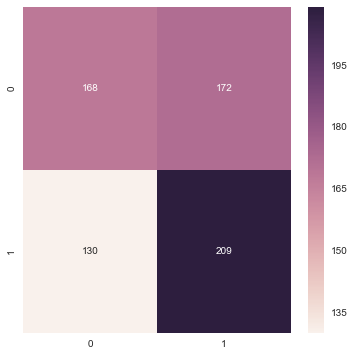

In [81]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test_inner,predictions),annot=True, fmt="d")

In [82]:
coeff_df = pd.DataFrame(logmodel.coef_.T,X_train_inner.columns)
coeff_df

,0
MYD,-2.253286
MYH,1.720016
MYA,0.291354


In [83]:
def get_optimal_bet(df,model,max_bet):
    return pd.Series(np.maximum((model.predict_proba(df) - 0.5)*2,0).T[1] * max_bet,index = df.index)

In [84]:
X_test_outer["bet"] = get_optimal_bet(X_test_outer.drop("bet_ratio",axis = 1),chosen_model,max_bet_per_match)

C:\Users\davidna2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
X_test_outer["right_wrong"] = y_test_outer

C:\Users\davidna2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
X_test_outer.head()

,MYD,MYH,MYA,bet_ratio,bet,right_wrong
10288,0.306667,0.455000,0.238333,2.25,0.000000,0
11576,0.313333,0.395000,0.291667,2.20,0.000000,1
12112,0.243333,0.340000,0.416667,2.10,0.000000,1
6925,0.248333,0.283333,0.468333,2.20,0.000000,1
945,0.305000,0.466667,0.228333,2.15,316.666667,0


In [106]:
games_worth_betting = X_test_outer[X_test_outer["bet"] > 0]

In [107]:
calc_rolling_mean(games_worth_betting,"right_wrong").tail()

10311    0.550980
5867     0.549902
11983    0.548828
7133     0.547758
5183     0.546693
dtype: float64

In [108]:
games_worth_betting["profit"] = games_worth_betting["right_wrong"]*(games_worth_betting["bet"]*games_worth_betting["bet_ratio"])-(games_worth_betting["bet"])

C:\Users\davidna2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
basic_info = ["season","stage","home_team_name","away_team_name","score","predictions"]
bet_info   = ["right_wrong","bet_ratio","bet","profit"]

all_bets                         = new_matches.loc[games_worth_betting.index][basic_info].sort_index()
all_bets[bet_info]               = games_worth_betting[bet_info]
all_bets["profit_through_time"]  = calc_rolling_sum(all_bets,"profit")
all_bets["invest_through_time"]  = calc_rolling_sum(all_bets,"bet")

all_bets.reset_index(drop=True,inplace=True)

all_bets.head()

,season,stage,home_team_name,away_team_name,score,predictions,right_wrong,bet_ratio,bet,profit,profit_through_time,invest_through_time
0,2010/2011,15,Fulham,Birmingham City,1 - 1,1,0,2.10,33.333333,-33.333333,0.000000,0.000000
1,2010/2011,15,Stoke City,Manchester City,1 - 1,2,0,2.20,128.888889,-128.888889,-33.333333,33.333333
2,2010/2011,17,Newcastle United,Liverpool,3 - 1,2,0,2.10,263.333333,-263.333333,-162.222222,162.222222
3,2010/2011,18,Blackpool,Tottenham Hotspur,3 - 1,2,0,1.91,283.333333,-283.333333,-425.555556,425.555556
4,2010/2011,18,Wigan Athletic,Aston Villa,1 - 2,2,1,2.38,30.000000,41.400000,-708.888889,708.888889


In [110]:
print("Mean Bet             =", all_bets["bet"].mean(),"$")
print("Max  Bet             =", all_bets["bet"].max(),"$")
print("Min  Bet             =", all_bets["bet"].min(),"$","\n")
print("Mean Profit          =", all_bets["profit"].mean(),"$")
print("Max  Profit          =", all_bets["profit"].max(),"$")
print("Min  Profit          =", all_bets["profit"].min(),"$","\n")
print("Total Money Invested =", all_bets["bet"].sum(),"$")
print("Profits              =", all_bets["profit"].sum(),"$")
print("Profit Percentage    =",(all_bets["profit"].sum()/all_bets["bet"].sum())*100,"%")

Mean Bet             = 219.48184620126392 $
Max  Bet             = 496.666666667 $
Min  Bet             = 0.146825396825 $ 

Mean Profit          = -16.817634843581455 $
Max  Profit          = 750.833333333 $
Min  Profit          = -493.333333333 $ 

Total Money Invested = 113033.15079365092 $
Profits              = -8661.08194444445 $
Profit Percentage    = -7.662426362205718 %


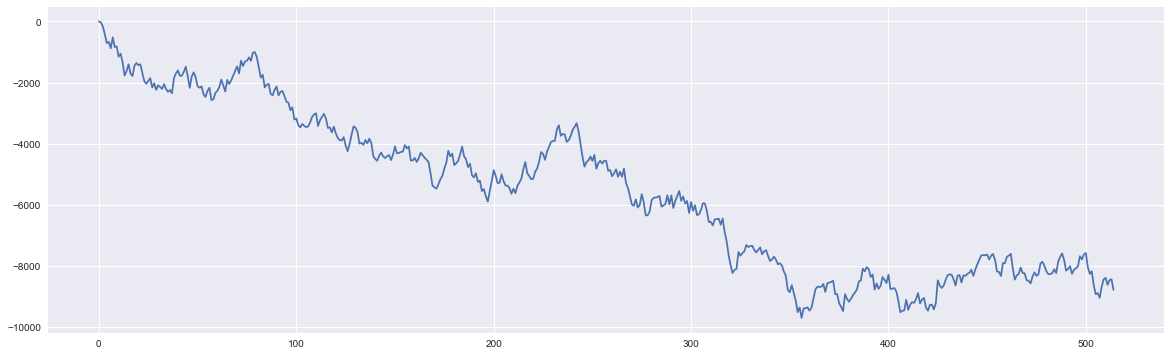

In [111]:
plt.figure(figsize=(20, 6))
plt.plot(all_bets.index,all_bets["profit_through_time"])

### Calculating profits for all models


In [168]:
basic_info = ["season","stage","home_team_name","away_team_name","score","predictions"]
bet_info   = ["right_wrong","bet_ratio","bet","profit"]
betting_house_dic = {"B365":b365_features, "WH":wh_features, "VC":vc_features }

def calc_model_profit(model_name,matches,my_features,current_bet,max_bet_per_match,bet_model_name):
    if model_name in bet_houses:
        current_bet = betting_house_dic[model_name]
    else:
        matches[my_features] = my_predictions[model_name]

    new_matches = matches.dropna(axis = 0)
    
    matches_betting_odds_features = new_matches[current_bet].dropna(axis = 0)

    if current_bet != my_features:
        matches_betting_odds_features = trasform_ratios_to_probs(matches_betting_odds_features)

    new_matches["predictions"] = get_naive_predictions(matches_betting_odds_features[current_bet])

    matches_betting_odds_features["predictions"] = new_matches["predictions"]
    matches_betting_odds_features["real_score"]  = new_matches['win_lose_draw']
    matches_betting_odds_features["right_wrong"] = pd.Series(matches_betting_odds_features["real_score"] == matches_betting_odds_features["predictions"],dtype = int)
    matches_betting_odds_features["bet_ratio"]   = get_optimal_bet_ratio(new_matches,bet_houses,matches_betting_odds_features["predictions"])

    new_matches_betting_odds_features = matches_betting_odds_features.drop(["predictions","real_score"],axis = 1)
    
    new_features = new_matches_betting_odds_features.drop(["right_wrong"],axis = 1)
    new_lables   = new_matches_betting_odds_features["right_wrong"]
    
    X_train_outer, X_test_outer, y_train_outer, y_test_outer = train_test_split(new_features, new_lables, test_size = 0.30, random_state = 101)
    X_train_outer.drop("bet_ratio",axis = 1,inplace = True)
    
    X_train_inner, X_test_inner, y_train_inner, y_test_inner = train_test_split(X_train_outer, y_train_outer, test_size = 0.30, random_state = 101)
    
    if bet_model_name == "LogisticRegression":
        bet_model = LogisticRegression()
    else:
        bet_model = RandomForestClassifier(n_estimators=600)    
    bet_model.fit(X_train_inner,y_train_inner)   
    predictions  = bet_model.predict(X_test_inner)
    
    X_test_outer["bet"] = get_optimal_bet(X_test_outer.drop("bet_ratio",axis = 1),bet_model,max_bet_per_match)
    X_test_outer["right_wrong"] = y_test_outer
    games_worth_betting = X_test_outer[X_test_outer["bet"] > 0]
    games_worth_betting["profit"] = games_worth_betting["right_wrong"]*(games_worth_betting["bet"]*games_worth_betting["bet_ratio"])-(games_worth_betting["bet"])
    
    all_bets                         = new_matches.loc[games_worth_betting.index][basic_info].sort_index()
    all_bets[bet_info]               = games_worth_betting[bet_info]
    all_bets["profit_through_time"]  = calc_rolling_sum(all_bets,"profit")
    all_bets["invest_through_time"]  = calc_rolling_sum(all_bets,"bet")

    all_bets.reset_index(drop=True,inplace=True)

    
    Mean_Bet             = all_bets["bet"].mean()
    Max_Bet              = all_bets["bet"].max()
    Min_Bet              = all_bets["bet"].min()
    Mean_Profit          = all_bets["profit"].mean()
    Max_Profit           = all_bets["profit"].max()
    Min_Profit           = all_bets["profit"].min()
    Total_Money_Invested = all_bets["bet"].sum()
    Profits              = all_bets["profit"].sum()
    Profit_Percentage    =(all_bets["profit"].sum()/all_bets["bet"].sum())*100 
    
    profit_stat = np.array([[Mean_Bet, Max_Bet, Min_Bet, Mean_Profit, Max_Profit, Min_Profit, Total_Money_Invested, Profits, Profit_Percentage]])
    profit_stat_names = ["Mean Bet", "Max Bet", "Min Bet", "Mean Profit", "Max Profit", "Min Profit", "Total Money Invested", "Profits", "Profit Percentage"]
    profit_stat_df = pd.DataFrame(profit_stat,index=[model_name],columns=profit_stat_names)

    return (all_bets,profit_stat_df)

In [169]:
all_bets_all_models = {}
profit_stat_all_models_dic = {}
profit_stat_all_models = pd.DataFrame()
for model in predictions_models_names:
    all_bets_all_models[model],profit_stat_all_models_dic[model] = calc_model_profit(model,matches,my_features,current_bet,max_bet_per_match,"RandomForestClassifier")
    frames = [profit_stat_all_models, profit_stat_all_models_dic[model]]
    profit_stat_all_models = pd.concat(frames)

C:\Users\davidna2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\davidna2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\davidna2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

C:\Users\davidna2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\davidna2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\davidna2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [170]:
profit_stat_all_models

,Mean Bet,Max Bet,Min Bet,Mean Profit,Max Profit,Min Profit,Total Money Invested,Profits,Profit Percentage
DecisionTreeClassifier,23.569007,23.569007,23.569007,-1.430654,88.383775,-23.569007,11101.002135,-673.837900,-6.070064
KNeighborsClassifier,208.334419,500.000000,0.191165,-0.467383,838.904882,-499.444444,88958.796859,-199.572378,-0.224342
LogisticRegression,210.668003,500.000000,1.666667,-10.631263,518.400000,-480.000000,105123.333333,-5305.000000,-5.046453
RandomForestClassifier,219.325870,498.333333,0.333333,-16.271385,702.666667,-498.333333,113391.474868,-8412.305860,-7.418817
nn_model,206.788793,500.000000,1.666667,-3.821157,938.000000,-496.666667,95950.000000,-1773.016667,-1.847855
final_soft_decision,211.184305,500.000000,3.333333,2.786717,727.866667,-496.666667,97778.333333,1290.250000,1.319566
B365,244.799288,500.000000,0.846922,-4.353202,631.309704,-500.000000,125337.235667,-2228.839595,-1.778274
WH,235.594793,500.000000,0.150794,2.557969,660.247619,-500.000000,120624.533767,1309.680329,1.085750
VC,241.853951,500.000000,0.173942,-15.790398,626.500000,-500.000000,128908.156113,-8416.282237,-6.528898


In [259]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
cmap = ListedColormap(['r', 'g'])
norm = BoundaryNorm([-np.inf, 0, np.inf], cmap.N)


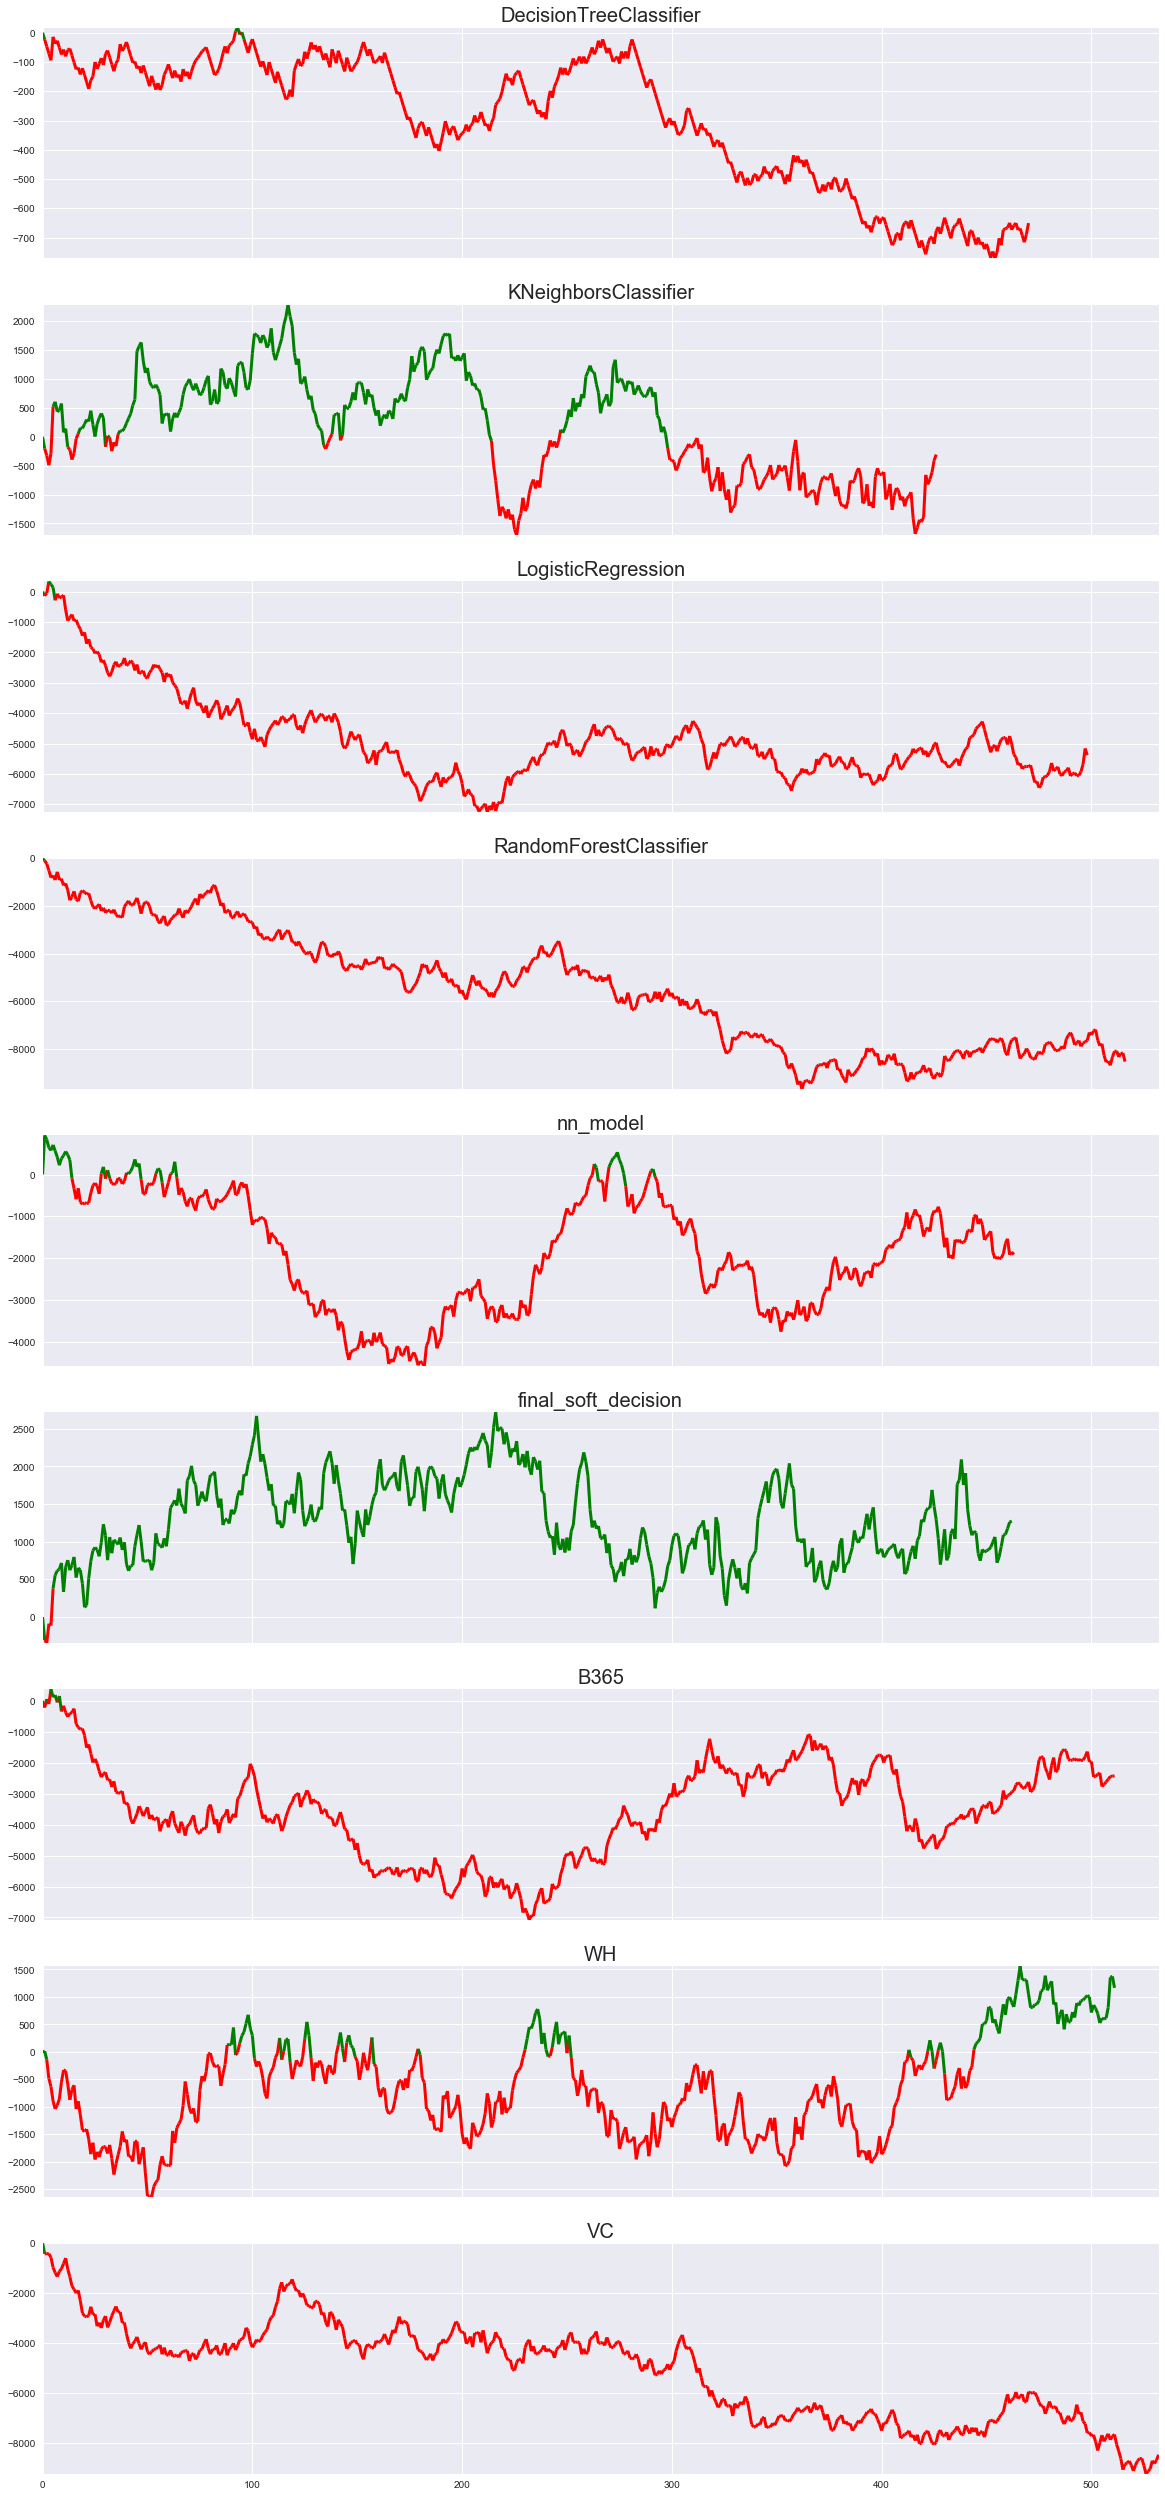

In [275]:
colors = {True:'green', False:'red'}
f, axarr = plt.subplots(len(profit_stat_all_models), 1,figsize=(20, 45), sharex=True, sharey=False)
for pp,model in enumerate(predictions_models_names):
    temp_df = pd.DataFrame(all_bets_all_models[model]["profit_through_time"],index = all_bets_all_models[model].index, columns=["profit_through_time"] )
    temp_df["sign"] = temp_df["profit_through_time"] >= 0
    temp_df.reset_index(inplace=True)
    
    x = temp_df.as_matrix(columns=["index"])
    x = np.squeeze(x)

    y = temp_df.as_matrix(columns=["profit_through_time"])
    y = np.squeeze(y)
    
    points = np.array([x , y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(y)
    lc.set_linewidth(3)
    axarr[pp].add_collection(lc)
    axarr[pp].set_xlim(x.min(), x.max())
    axarr[pp].set_ylim(y.min(), y.max())
    axarr[pp].set_title(model,fontsize = 20)
